# Processing a a run (using >1 module)

In [1]:
%load_ext autoreload
%autoreload 2

#### imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pylars
from pylars.plotting.plotprocessed import *
from pylars.plotting.plotwaveforms import *
from pylars.processing.waveforms import waveform_processing
from pylars.processing.pulses import pulse_processing
from pylars.utils.input import *
from pylars.utils.output import *

## Define and load the desired run

In [3]:
base_run = run(run_number = 6, main_data_path='/disk/gfs_atp/xenoscope/SiPMs/char_campaign/raw_data/')

In [4]:
all_runs = base_run.get_run_df()

In [5]:
all_runs.head()

,kind,module,temp,vbias,path
0,BV,0,170.0,46.00,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
1,BV,1,170.0,46.00,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
2,BV,0,170.0,46.25,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
3,BV,1,170.0,46.25,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
4,BV,0,170.0,46.50,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...


## Define and load processor

In [6]:
process = pylars.processing.rawprocessor.run_processor(base_run, 'simple', sigma_level=5, baseline_samples=50)

In [7]:
#For processing full runs tqdm per channels comes off by default
process.print_tqdm_options()
print('')
process.set_tqdm_channel(bar=True, show=True)
process.set_tqdm_run(bar=False, show=False)
process.print_tqdm_options()

show bar channel:True
show tqdm channel:True
show bar run:True
show tqdm run:True

show bar channel:True
show tqdm channel:True
show bar run:False
show tqdm run:False


In [8]:
data = process.process_datasets(kind='BV', vbias=50.75, temp = 170)

Found 2 datasets. Ramping up processor!


Processing module 1 channel wf6: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:04<00:00, 10983.86it/s]


#### #Done

In [9]:
data.head()

,module,channel,wf_number,pulse_number,area,length,position,amplitude
0,0,wf0,0,0,1528060.0,73,304,2567.0
1,0,wf0,0,1,0.0,1,380,15484.5
2,0,wf0,0,2,42685.0,22,385,15096.0
3,0,wf0,1,0,1963175.0,96,306,1517.0
4,0,wf0,1,1,0.0,1,403,15487.5


## Make some plots

In [10]:
mod0_ch0 = data[(data['channel']=='wf0') &
                (data['module']==0)]

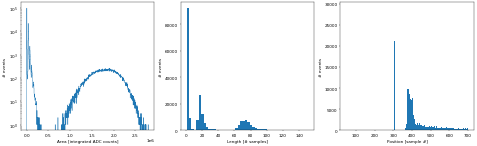

In [11]:
fig, axs = plt.subplots(1,3,figsize=(16,5), dpi = 30)
axs = plot_3hists(mod0_ch0, axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

#### Just LED signal

In [12]:
cut_mask = ((mod0_ch0['position'] > 300) &
            (mod0_ch0['position'] < 350) &
            (mod0_ch0['length'] > 20))

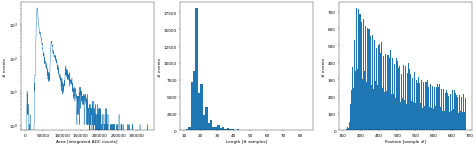

In [30]:
fig, axs = plt.subplots(1,3,figsize=(16,5), dpi = 30)
axs = plot_3hists(mod0_ch0[cut_mask], axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

#### Just to the rigth of the LED pulse

In [14]:
cut_mask = ((mod0_ch0['position'] > 350))

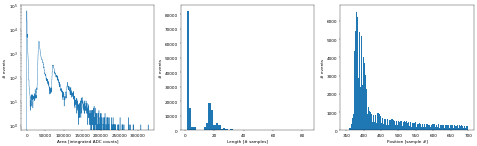

In [15]:
fig, axs = plt.subplots(1,3,figsize=(16,5), dpi = 30)
axs = plot_3hists(mod0_ch0[cut_mask], axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

In [16]:
cut_mask = ((mod0_ch0['position'] > 350) &
            (mod0_ch0['length'] > 10))

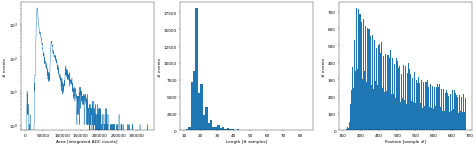

In [17]:
fig, axs = plt.subplots(1,3,figsize=(16,5), dpi = 30)
axs = plot_3hists(mod0_ch0[cut_mask], axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

These are very likely afterpulses! Nice! 

## Save the processed data using its own class

In [18]:
processed_data = processed_dataset(run = base_run,
                                   kind = 'BV',
                                   vbias = 50.75, 
                                   temp = 170, 
                                   path_processed = './',
                                   process_hash= process.hash)

In [19]:
processed_data.__dict__

{'run': Run 6,
 'kind': 'BV',
 'vbias': 50.75,
 'temp': 170,
 'process_hash': 'qm7qo2b',
 'path_processed': './',
 'hash': '1097931495133614094'}

In [20]:
processed_data.load_data(force = True)

In [ ]:
!mkdir run6

In [23]:
processed_data.save_data()

Saved file to: ./run6/BV_170.00_50.75-qm7qo2b.h5


In [24]:
processed_data.data.iloc[1234]

module                  0
channel               wf0
wf_number             283
pulse_number            0
area            1582725.0
length                 72
position              304
amplitude          3552.0
Name: 1234, dtype: object

### Delete and load from cache

In [25]:
del processed_data, data

In [26]:
processed_data = processed_dataset(run = base_run,
                                   kind = 'BV',
                                   vbias = 50.75, 
                                   temp = 170, 
                                   path_processed = './',
                                   process_hash= process.hash)

In [27]:
processed_data.load_data()

In [28]:
processed_data.data.iloc[1234]

module                  0
channel               wf0
wf_number             283
pulse_number            0
area            1582725.0
length                 72
position              304
amplitude          3552.0
Name: 1234, dtype: object